# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`

> "Hi Team! 👋

> The current notebook contains 9 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between the 13th of October 2014 through the 13th of September 2022 (nine years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM

In [3]:
# extract the historical stock data of stock of Walmart and stock of IBM
WMT_df = pdr.get_data_yahoo("WMT", 
                            start = dt.datetime(2014, 10, 13), 
                            end = dt.datetime(2022, 9, 13))["Adj Close"]
IBM_df = pdr.get_data_yahoo("IBM", 
                  start = dt.datetime(2014, 10, 13), 
                  end = dt.datetime(2022, 9, 13))['Adj Close']

In [4]:
# combine the historical stock data into one dataframe
frame = [IBM_df, WMT_df]
stock_df = pd.concat(frame, axis = 1, keys = ["IBM", "WMT"])
stock_df = stock_df.rename_axis(index = "Date", columns = "Ticker", axis = 1)

In [5]:
stock_df

Ticker,IBM,WMT
Date,,
2014-10-13,124.599335,65.120033
2014-10-14,124.789436,65.472656
2014-10-15,123.397583,63.138523
2014-10-16,122.100815,61.979904
2014-10-17,123.601273,62.214973
...,...,...
2022-09-07,127.709999,135.740005
2022-09-08,128.470001,136.429993
2022-09-09,129.190002,136.839996


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

In [6]:
# set the moving windows
SHORT = 20
LONG = 60

In [7]:
# compute the short and long moving average respectively
IBM_df2 = pd.DataFrame(index = stock_df.index)
IBM_df2['SMA_20'] = stock_df['IBM'].rolling(window = SHORT).mean()
IBM_df2['SMA_60'] = stock_df['IBM'].rolling(window = LONG).mean()
IBM_df2['IBM'] = stock_df['IBM']

In [8]:
# create the signal when short moving average crossover the long moving average
IBM_df2['our_positions']= np.where(IBM_df2["SMA_20"] < 
                                              IBM_df2['SMA_60'], -1, 1)

In [9]:
# drop NA
IBM_df2.dropna(inplace = True)

In [61]:
IBM_df2

,SMA_20,SMA_60,IBM,our_positions
Date,,,,
2015-01-07,108.487847,111.236362,105.990356,-1
2015-01-08,108.331646,110.964607,108.294052,-1
2015-01-09,108.283794,110.697546,108.765717,-1
2015-01-12,108.125541,110.423261,106.940506,-1
2015-01-13,108.174418,110.174805,107.193466,-1
...,...,...,...,...
2022-09-07,132.643499,133.397378,127.709999,-1
2022-09-08,132.491999,133.314730,128.470001,-1
2022-09-09,132.324500,133.234041,129.190002,-1


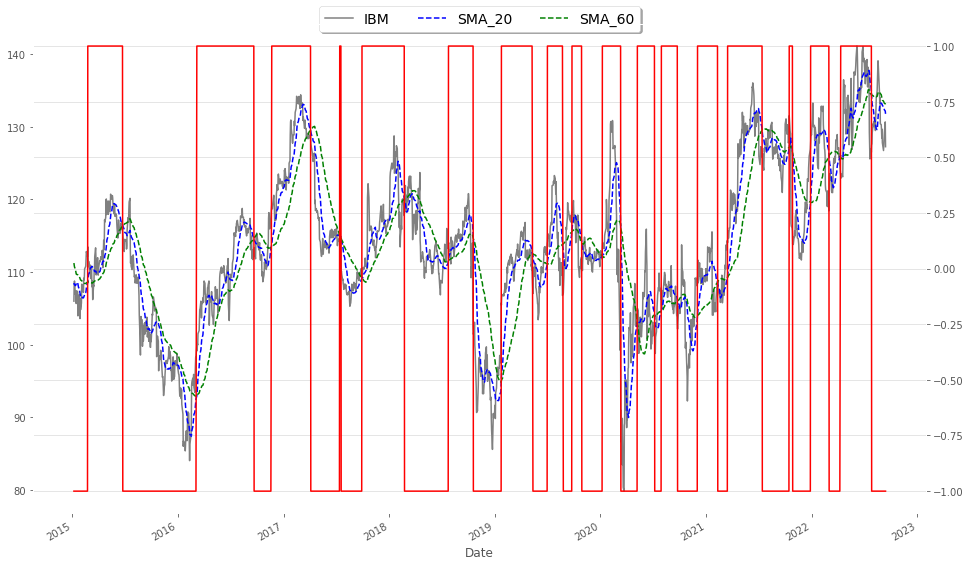

In [43]:
ax = IBM_df2[['IBM', 
                  "SMA_20", 
                  "SMA_60", 
                 "our_positions"]
                ].plot(secondary_y = "our_positions", 
                      figsize = (16, 10), 
                      style = ['grey', 
                              "b--", 
                              "g--", 
                              'red'])

ax.legend(loc = "upper center",
          bbox_to_anchor = (0.5, 1.05),
         ncol = 3, shadow = True)

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

In [12]:
IBM_df2['RETURNS'] = np.log(IBM_df2.IBM / IBM_df2.IBM.shift(1))
IBM_df2['STRATEGY'] = IBM_df2['our_positions'].shift(1) * IBM_df2['RETURNS']

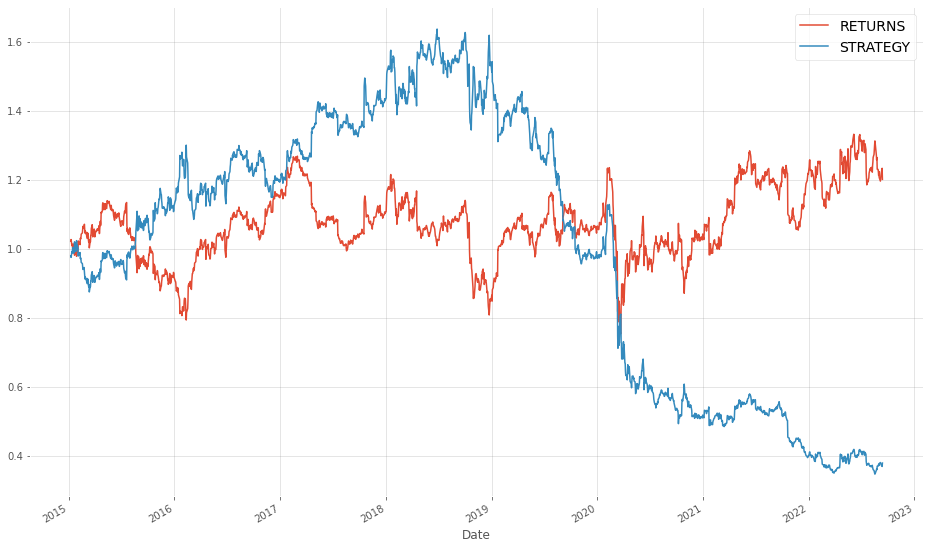

In [13]:
ax = IBM_df2[["RETURNS", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16, 10))

### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

In [14]:
IBM_df2['CUMULATIVE_RETURNS'] = IBM_df2['STRATEGY'].cumsum().apply(np.exp)
IBM_df2['MAX_GROSS_PERFORMANCE'] = IBM_df2['CUMULATIVE_RETURNS'].cummax()

<AxesSubplot:xlabel='Date'>

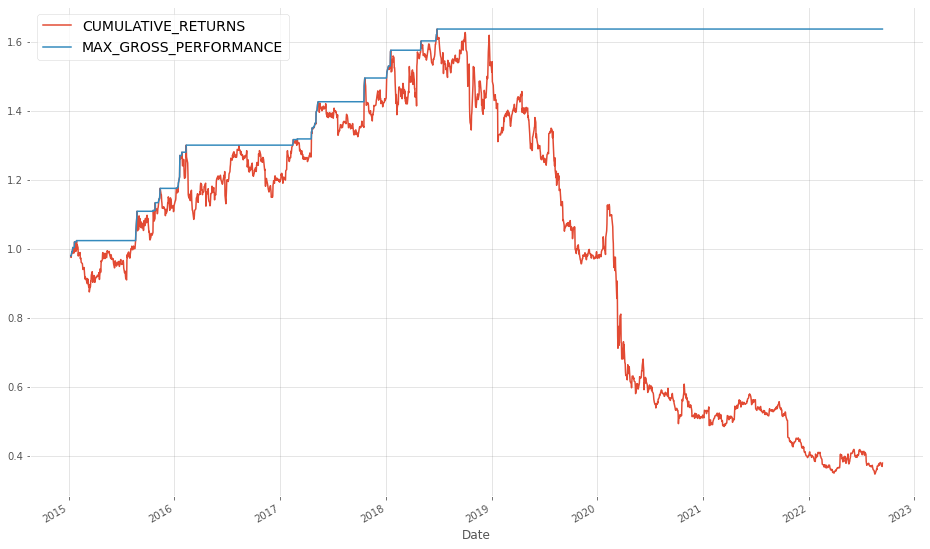

In [15]:
IBM_df2[['CUMULATIVE_RETURNS', 'MAX_GROSS_PERFORMANCE']].dropna().plot(figsize = (16, 10))

In [16]:
# maximum drawdown
drawdown = IBM_df2['MAX_GROSS_PERFORMANCE'] - IBM_df2["CUMULATIVE_RETURNS"]
drawdown.max()

1.2901816406654736

In [45]:
drawdown[drawdown == 0].index[-1]

Timestamp('2018-06-27 00:00:00')

In [46]:
# longest drawdown period
drawdown_period1 = (IBM_df2.index[-1].to_pydatetime() - drawdown[drawdown == 0].index[-1].to_pydatetime())

In [48]:
drawdown_period1

datetime.timedelta(days=1539)

In [19]:
# longest drawdown period
drawdown_period2 = (drawdown[drawdown == 0].index[1:].to_pydatetime() - 
                   drawdown[drawdown == 0].index[:-1].to_pydatetime())

In [20]:
drawdown_period2.max()

datetime.timedelta(days=369)

In [50]:
print("The maximum drawdown is about {} percentage points".format(np.round(drawdown.max(), 4) * 100))

The maximum drawdown is about 129.02 percentage points


### Please make sure to answer below.

    The maximum drawdown is about _____129______ percentage points.
    The longest drawdown period lasts for _____1539______ days.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

In [21]:
WMT_df2 = pd.DataFrame()
WMT_df2['PRICES'] = stock_df["WMT"]
WMT_df2['RETURNS'] = np.log(WMT_df2['PRICES'] / WMT_df2['PRICES'].shift(1))
WMT_df2["SMA_41"] = WMT_df2["PRICES"].rolling(window = 41).mean()

In [22]:
# threshold value of 4
T = 4

In [23]:
WMT_df2["DIST"] = WMT_df2['PRICES'] - WMT_df2["SMA_41"]

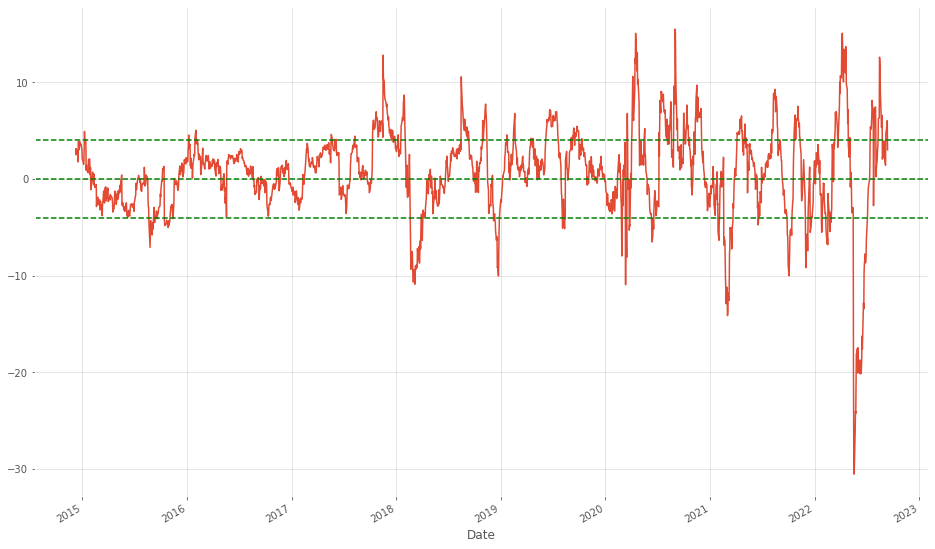

In [24]:
WMT_df2["DIST"].dropna().plot(figsize = (16, 10))

plt.axhline(T, color = 'green', ls = "--")
plt.axhline(0, color = 'green', ls = '--')
plt.axhline(-T, color = 'green', ls = '--')

### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

In [25]:
WMT_df2["Position"] = np.where(WMT_df2["DIST"] > T, -1, 
                               np.nan)

In [26]:
WMT_df2["Position"] = np.where(WMT_df2["DIST"] < -T, 1, 
                              WMT_df2["Position"])

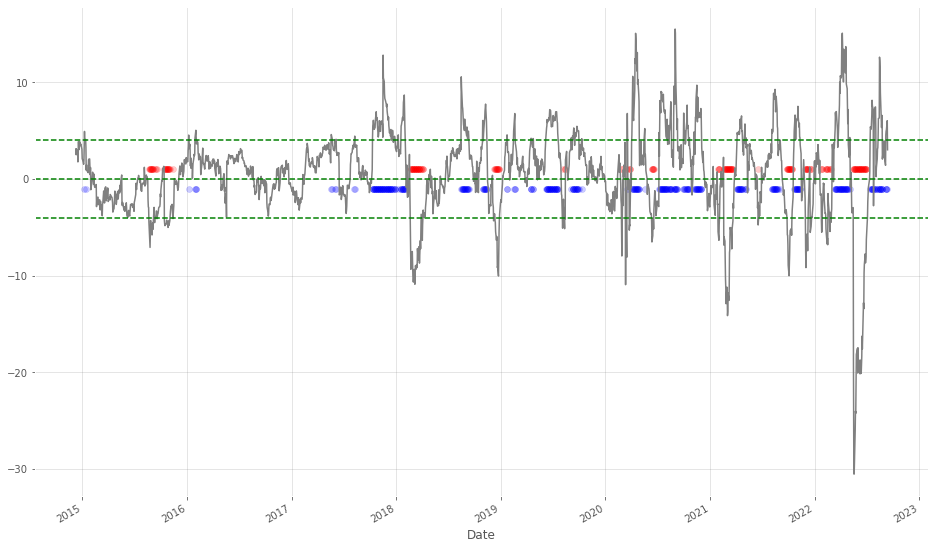

In [27]:
WMT_df2["DIST"].dropna().plot(figsize = (16, 10), color = 'grey')

plt.axhline(T, color = 'green', ls = "--")
plt.axhline(0, color = 'green', ls = '--')
plt.axhline(-T, color = 'green', ls = '--')

plt.scatter(x = WMT_df2.Position[WMT_df2.Position == 1].index, 
           y = WMT_df2.Position[WMT_df2.Position == 1], color = 'red', 
           alpha = 0.2)

plt.scatter(x = WMT_df2.Position[WMT_df2.Position == -1].index, 
           y = WMT_df2.Position[WMT_df2.Position == -1], color = 'blue', 
           alpha = 0.2)

In [28]:
(WMT_df2["Position"] == 1).sum() + (WMT_df2["Position"] == -1).sum()

541

### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were ___541____ trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

In [29]:
WMT_df2['Position'] = np.where(WMT_df2["DIST"]* WMT_df2["DIST"].shift(1) < 0, # price crossover SMA
                              0, WMT_df2["Position"])

In [30]:
WMT_df2['Position'] = WMT_df2["Position"].ffill().fillna(0) 
# perform same trade signal in the next trading day until there is another trade signal

In [31]:
WMT_df2['RETURNS'] = np.log(stock_df['WMT'] / stock_df['WMT'].shift(1))
WMT_df2["STRATEGY"] = WMT_df2['Position'].shift(1) * WMT_df2["RETURNS"]

<AxesSubplot:xlabel='Date'>

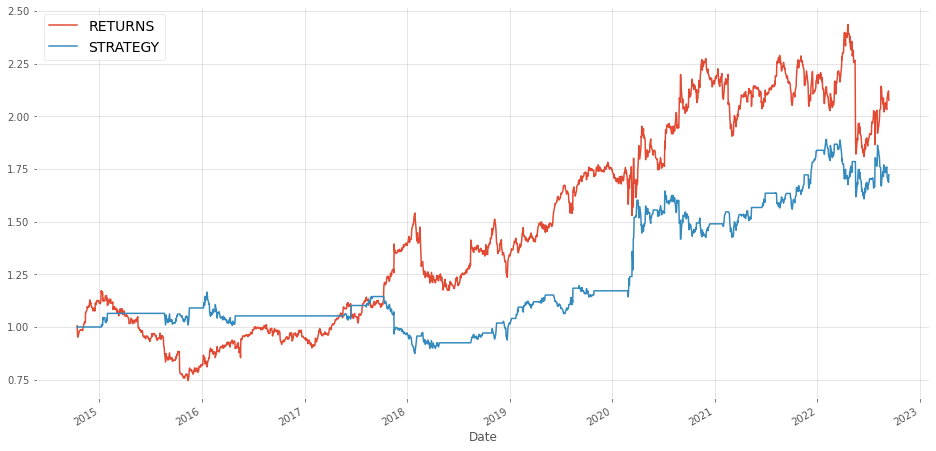

In [32]:
WMT_df2[["RETURNS", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = (16, 8))

### <font color = red> Question 8</font>. Please calculate the Sharpe Ratio of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of ____0.096_____ . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of _____0.421____ .

In [37]:
IBM_df2

,SMA_20,SMA_60,IBM,our_positions,RETURNS,STRATEGY,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE
Date,,,,,,,,
2015-01-07,108.487836,111.236360,105.990349,-1,NaN,NaN,NaN,NaN
2015-01-08,108.331638,110.964605,108.294060,-1,0.021502,-0.021502,0.978727,0.978727
2015-01-09,108.283788,110.697543,108.765717,-1,0.004346,-0.004346,0.974483,0.978727
2015-01-12,108.125536,110.423258,106.940498,-1,-0.016924,0.016924,0.991115,0.991115
2015-01-13,108.174412,110.174802,107.193443,-1,0.002362,-0.002362,0.988776,0.991115
...,...,...,...,...,...,...,...,...
2022-09-07,132.643499,133.397378,127.709999,-1,0.007782,-0.007782,0.376970,1.636359
2022-09-08,132.491999,133.314730,128.470001,-1,0.005933,-0.005933,0.374740,1.636359
2022-09-09,132.324500,133.234041,129.190002,-1,0.005589,-0.005589,0.372651,1.636359


In [38]:
IBM_return = IBM_df2['STRATEGY']
IBM_sharpe = np.sqrt(253) * (IBM_return.mean() / IBM_return.std())
IBM_sharpe

-0.5116556441897893

In [34]:
WMT_return = WMT_df2["RETURNS"]
WMT_sharpe = np.sqrt(253) * (WMT_return.mean() / WMT_return.std())
WMT_sharpe
 

0.42098494470855946

### <font color = red> Question 9</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a CAGR of ____0.024_____ . 

    Mean reversion strategy for WMT leads to a CAGR of ____0.097_____ .


In [35]:
IBM_day = (IBM_df2.index[-1] - IBM_df2.index[0]).days

((IBM_df2.IBM[-1] / IBM_df2.IBM[0]) ** (1 / (IBM_day / 365))) - 1

0.024064038698808243

In [42]:
WMT_day = (WMT_df2.index[-1] - WMT_df2.index[0]).days

((WMT_df2.PRICES[-1] / WMT_df2.PRICES[0]) ** (1 / (WMT_day / 365))) - 1

0.09660401008390762

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>